In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df_train.Sex = lc.fit_transform(df_train.Sex)
df_train.Embarked = lc.fit_transform(df_train.Embarked)


In [59]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [60]:
df_train.drop(['Name','Cabin','Ticket','PassengerId'], axis = 1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [61]:
df_train.drop(['SibSp','Parch'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
888,0,3,0,NaN,23.4500,2
889,1,1,1,26.0,30.0000,0


In [62]:
x = df_train.drop(['Survived'],axis=1)
y = df_train.Survived
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
s_x = sc.fit_transform(x)
s_x

array([[ 0.82737724,  0.73769513, -0.53037664, -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.57183099,  0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.25482473, -0.48885426,  0.58111394],
       ...,
       [ 0.82737724, -1.35557354,         nan, -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513, -0.25482473, -0.04438104, -1.93846038],
       [ 0.82737724,  0.73769513,  0.15850313, -0.49237783, -0.67867322]])

In [63]:
s_x = np.nan_to_num(s_x)
s_x

array([[ 0.82737724,  0.73769513, -0.53037664, -0.50244517,  0.58111394],
       [-1.56610693, -1.35557354,  0.57183099,  0.78684529, -1.93846038],
       [ 0.82737724, -1.35557354, -0.25482473, -0.48885426,  0.58111394],
       ...,
       [ 0.82737724, -1.35557354,  0.        , -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513, -0.25482473, -0.04438104, -1.93846038],
       [ 0.82737724,  0.73769513,  0.15850313, -0.49237783, -0.67867322]])

In [64]:
from sklearn.model_selection import train_test_split
train_s_x, test_s_x, train_y, test_y = train_test_split(s_x,y,random_state=0,test_size=0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_s_x, train_y)
train_s_x_pred = model.predict(train_s_x)
test_s_x_pred = model.predict(test_s_x)

In [65]:
model.score(train_s_x, train_y)

0.7881219903691814

In [66]:
model.score(test_s_x, test_y)


0.7947761194029851

In [67]:
from sklearn.metrics import classification_report
report = classification_report(test_y, test_s_x_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.72      0.74      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



In [68]:
df_test = test.copy()

In [69]:
df_test.drop(["Name", "Parch"], axis=1, inplace=True)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,363272,7.0000,NaN,S
2,894,2,male,62.0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,359309,8.0500,NaN,S


In [70]:
le = LabelEncoder()
df_test.Sex = le.fit_transform(df_test['Sex'])
df_test.drop(["Ticket", "PassengerId","SibSp"], axis=1, inplace=True)
df_test.drop(["Cabin"], axis=1, inplace=True)
df_test

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,Q
1,3,0,47.0,7.0000,S
2,2,1,62.0,9.6875,Q
3,3,1,27.0,8.6625,S
4,3,0,22.0,12.2875,S
...,...,...,...,...,...
413,3,1,NaN,8.0500,S
414,1,0,39.0,108.9000,C
415,3,1,38.5,7.2500,S
416,3,1,NaN,8.0500,S


In [71]:
df_test.Embarked = le.fit_transform(df_test['Embarked'])
df_test

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,1
1,3,0,47.0,7.0000,2
2,2,1,62.0,9.6875,1
3,3,1,27.0,8.6625,2
4,3,0,22.0,12.2875,2
...,...,...,...,...,...
413,3,1,NaN,8.0500,2
414,1,0,39.0,108.9000,0
415,3,1,38.5,7.2500,2
416,3,1,NaN,8.0500,2


In [72]:
sc = StandardScaler()
test_sc = sc.fit_transform(df_test)
test_sc

array([[ 0.87348191,  0.75592895,  0.29854934, -0.49781052, -0.47091535],
       [ 0.87348191, -1.32287566,  1.18132793, -0.51265996,  0.70076689],
       [-0.31581919,  0.75592895,  2.24066224, -0.46453181, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.58103849, -0.50818292,  0.70076689],
       [ 0.87348191,  0.75592895,         nan, -0.4938564 ,  0.70076689],
       [ 0.87348191,  0.75592895,         nan, -0.23762123, -1.64259759]])

In [73]:
test_sc = np.nan_to_num(test_sc)
test_sc

array([[ 0.87348191,  0.75592895,  0.29854934, -0.49781052, -0.47091535],
       [ 0.87348191, -1.32287566,  1.18132793, -0.51265996,  0.70076689],
       [-0.31581919,  0.75592895,  2.24066224, -0.46453181, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.58103849, -0.50818292,  0.70076689],
       [ 0.87348191,  0.75592895,  0.        , -0.4938564 ,  0.70076689],
       [ 0.87348191,  0.75592895,  0.        , -0.23762123, -1.64259759]])

In [75]:
preds_test = model.predict(test_sc) 


In [77]:
preds_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
submission = pd.read_csv('gender_submission.csv')
submission.Survived

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [80]:
preds_test == submission.Survived

0      True
1      True
2      True
3      True
4      True
       ... 
413    True
414    True
415    True
416    True
417    True
Name: Survived, Length: 418, dtype: bool

In [81]:
df = pd.concat([df_train,test])
df

,Survived,Pclass,Sex,Age,Fare,Embarked,PassengerId,Name,SibSp,Parch,Ticket,Cabin
0,0.0,3,1,22.0,7.2500,2,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,0,38.0,71.2833,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3,0,26.0,7.9250,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1,0,35.0,53.1000,2,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,3,1,35.0,8.0500,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,NaN,8.0500,S,1305.0,"Spector, Mr. Woolf",0.0,0.0,A.5. 3236,NaN
414,NaN,1,female,39.0,108.9000,C,1306.0,"Oliva y Ocana, Dona. Fermina",0.0,0.0,PC 17758,C105
415,NaN,3,male,38.5,7.2500,S,1307.0,"Saether, Mr. Simon Sivertsen",0.0,0.0,SOTON/O.Q. 3101262,NaN
416,NaN,3,male,NaN,8.0500,S,1308.0,"Ware, Mr. Frederick",0.0,0.0,359309,NaN


In [83]:
df.value_counts('Pclass')
pclass = df.groupby(['Pclass']).size().reset_index().sort_values(by = 'Pclass',ascending = True).rename(columns = {0:'counts'})
pclass

,Pclass,counts
0,1,323
1,2,277
2,3,709


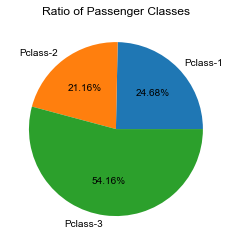

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(pclass.counts,labels  = ['Pclass-1','Pclass-2','Pclass-3'],autopct = '%1.2f%%')
plt.title('Ratio of Passenger Classes')
sns.set_style("darkgrid")
plt.show()

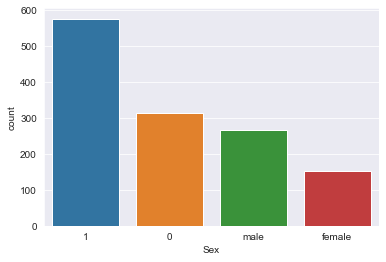

In [88]:
sns.countplot(x = 'Sex',data = df)
plt.show()

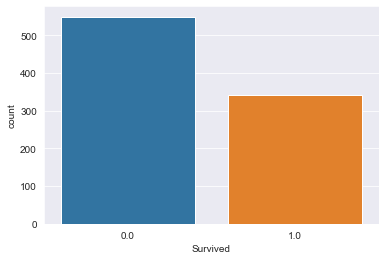

In [89]:
sns.countplot(x = 'Survived',data = df)
plt.show()